# Steps

1. Import Required Libraries
2. Load the data
3. Preprocess the Data
4. Define the Model
5. Compile the Model
6. Fit the Model
7. Evaluate

# Importing the required libraries

In [ ]:
# Helper Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

print(keras.__version__)

2.3.0
2.4.0


In [ ]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization, Flatten

In [ ]:
from keras.datasets import mnist

# Load and Explore the Data

In [ ]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [ ]:
# An example data point
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

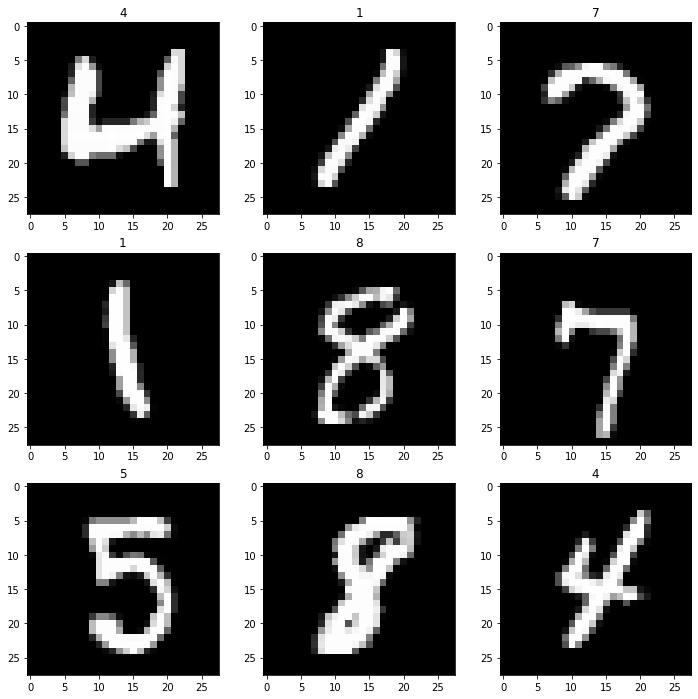

In [ ]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')


# Data Preprocessing

In [ ]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

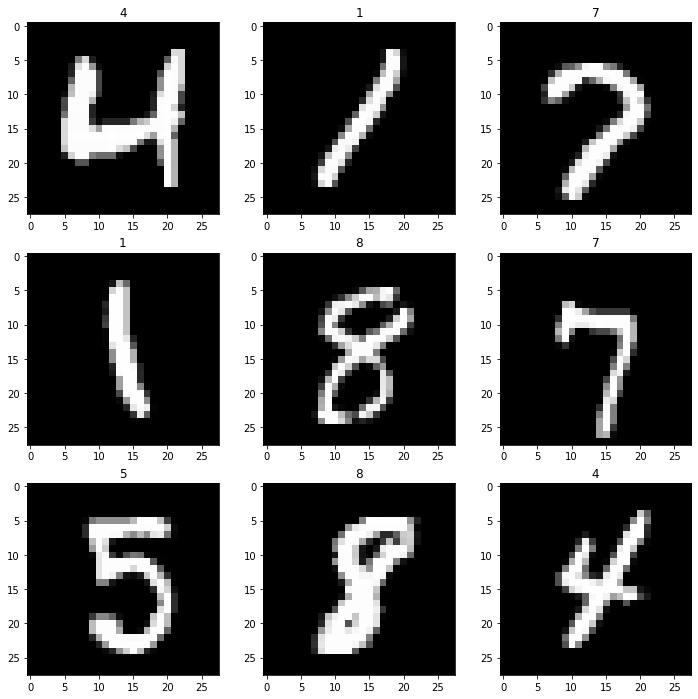

In [ ]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')


In [ ]:
X_train_o = X_train
X_test_o = X_test

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Softmax classifier

In [ ]:
# Define the Model
model = None
model = Sequential()

model.add(Dense(10, input_dim=784, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Model

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Fit the Model

model.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6790 - accuracy: 0.8310
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3626 - accuracy: 0.9019
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3194 - accuracy: 0.9122
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.9170
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.9200
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2800 - accuracy: 0.9222
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2739 - accuracy: 0.9232
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2690 - accuracy: 0.9254
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2655 - accuracy: 0.9261
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.9275

In [ ]:
prediction_score = model.evaluate(X_test, Y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.2677675783634186, 0.9265999794006348]


# Sigmoid Activation

In [ ]:
# Define the Model

model_sigmoid = None
model_sigmoid = Sequential()

model_sigmoid.add(Dense(512, input_dim=784, activation='sigmoid', kernel_initializer='glorot_normal'))
model_sigmoid.add(Dropout(0.3))

model_sigmoid.add(Dense(128, activation='sigmoid', kernel_initializer='glorot_normal'))
model_sigmoid.add(Dropout(0.3))

model_sigmoid.add(Dense(10, activation='softmax'))

In [ ]:
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Model

model_sigmoid.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Fit the Model

model_sigmoid.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6504 - accuracy: 0.8073
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2874 - accuracy: 0.9148
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2205 - accuracy: 0.9348
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1795 - accuracy: 0.9470
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1488 - accuracy: 0.9560
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1275 - accuracy: 0.9624
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1094 - accuracy: 0.9675
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0970 - accuracy: 0.9711
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0875 - accuracy: 0.9734
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0782 - accuracy: 0.9761

In [ ]:
prediction_score = model_sigmoid.evaluate(X_test, Y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.073416568338871, 0.9757000207901001]


# ReLU Activation

In [ ]:
# Define the Model

model_relu = None
model_relu = Sequential()

# FC - 512
model_relu.add(Dense(512, input_dim=784, activation='relu', kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.3))

# FC - 128
model_relu.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.3))

# FC - 10
model_relu.add(Dense(10, activation='softmax'))

# Compile the Model

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the Model

model_relu.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2889 - accuracy: 0.9126
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1336 - accuracy: 0.9600
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1050 - accuracy: 0.9679
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0845 - accuracy: 0.9742
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0737 - accuracy: 0.9764
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0659 - accuracy: 0.9783
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0575 - accuracy: 0.9815
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0527 - accuracy: 0.9827
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0487 - accuracy: 0.9846
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0444 - accuracy: 0.9855

In [ ]:
prediction_score = model_relu.evaluate(X_test, Y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.06081930547952652, 0.9810000061988831]


# Flatten

In [ ]:
print(X_train_o.shape, X_test_o.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
# Define the Model

model_relu_flat = None
model_relu_flat = Sequential()

# Flatten
model_relu_flat.add(Flatten(input_shape=(28, 28)))

# FC - 512
model_relu_flat.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model_relu_flat.add(BatchNormalization())
model_relu_flat.add(Dropout(0.3))

# FC - 128
model_relu_flat.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_relu_flat.add(BatchNormalization())
model_relu_flat.add(Dropout(0.3))

# FC - 10
# Softmax
model_relu_flat.add(Dense(10, activation='softmax'))

# Compile the Model

model_relu_flat.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the Model

model_relu_flat.fit(X_train_o, Y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2862 - accuracy: 0.9129
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1347 - accuracy: 0.9585
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1024 - accuracy: 0.9684
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0839 - accuracy: 0.9740
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0746 - accuracy: 0.9773
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0648 - accuracy: 0.9788
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0588 - accuracy: 0.9810
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0518 - accuracy: 0.9831
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0468 - accuracy: 0.9848
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0427 - accuracy: 0.9859

In [ ]:
prediction_score = model_relu_flat.evaluate(X_test_o, Y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.060686271637678146, 0.9815999865531921]
